In [1]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df  =df.drop(df[['RowNumber','CustomerId','Surname']],axis = 1)

In [6]:
df.shape

(10000, 11)

In [10]:
df = df.astype('float64')

In [9]:
df  =pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


In [12]:
x= df.drop(['Exited'],axis  = 1)
y= df['Exited']

In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0


In [14]:
y.head()

,Exited
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [18]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [19]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [20]:
import tensorflow

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [22]:
model = Sequential()

In [23]:
## Input layer
model.add(Dense(units = 11,activation='relu'))   # units  = number of imputs

In [24]:
## first hidden layer
model.add(Dense(units = 7 , activation='relu'))

In [25]:
## second hidden layer
model.add(Dense(units = 6, activation='relu'))

In [26]:
## Output layer
model.add(Dense(units  = 1,activation='sigmoid' ))


In [27]:
optmizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [28]:
model.compile(optimizer=optmizer,loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,validation_split=0.33, batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7636 - loss: 0.5025 - val_accuracy: 0.8391 - val_loss: 0.3775
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8527 - loss: 0.3540 - val_accuracy: 0.8406 - val_loss: 0.3741
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8564 - loss: 0.3499 - val_accuracy: 0.8474 - val_loss: 0.3658
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8564 - loss: 0.3559 - val_accuracy: 0.8501 - val_loss: 0.3672
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8678 - loss: 0.3354 - val_accuracy: 0.8383 - val_loss: 0.3715
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8569 - loss: 0.3557 - val_accuracy: 0.8455 - val_loss: 0.3691
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8638 - loss: 0.3339 - val_accuracy: 0.8501 - val_loss: 0.3598
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8586 - loss: 0.3441 - val_accu

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

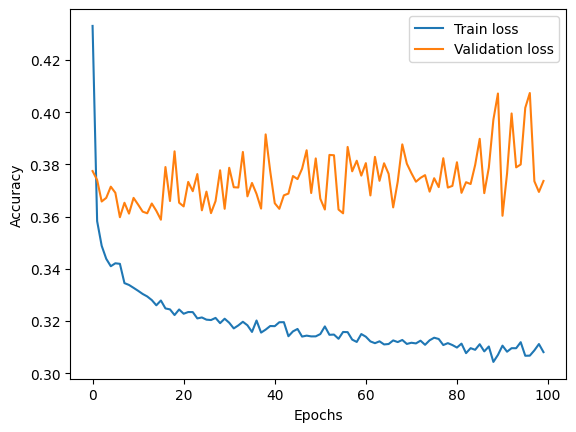

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


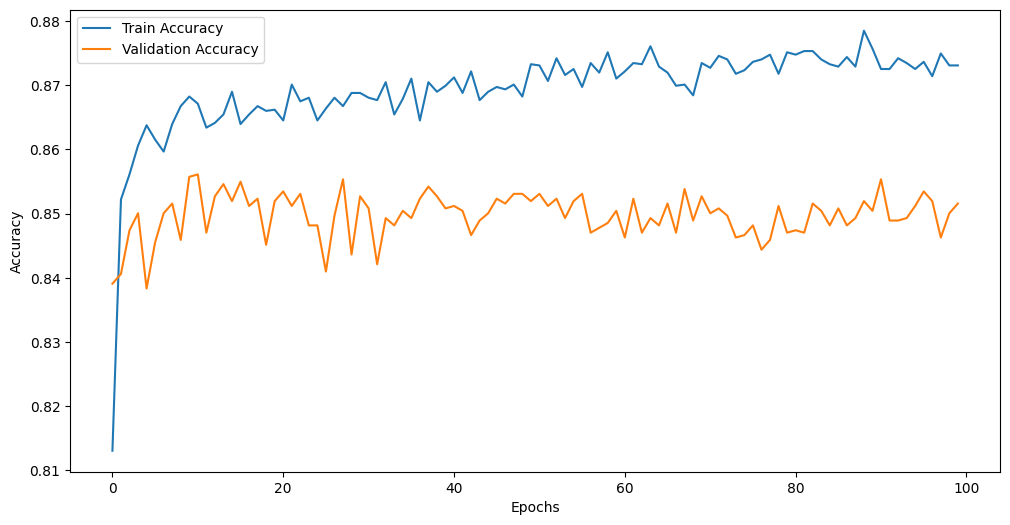

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
y_pred =model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


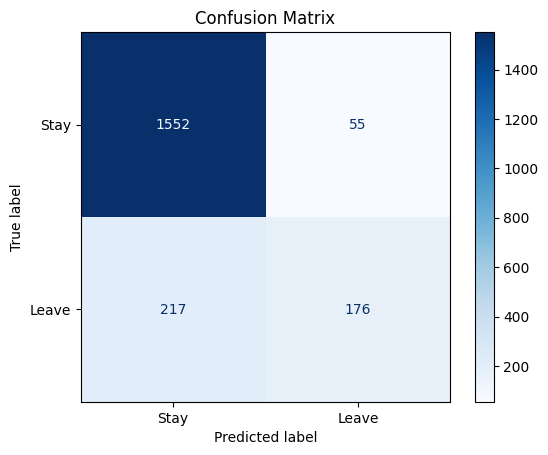

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you already have:
# y_test: the actual labels
# y_pred: the predicted labels (0 or 1)

# If y_pred are probabilities (e.g., from model.predict), convert to labels
y_pred_labels = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
